Data Visualization of Earthquake dataset

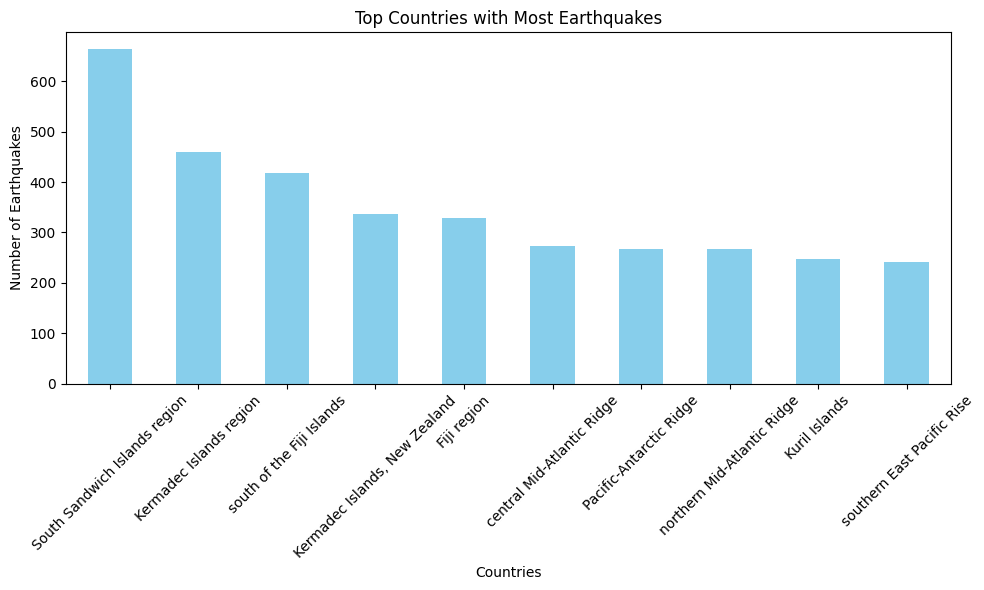

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load earthquake data from CSV file (replace 'earthquake_data.csv' with your file name)
data = pd.read_csv('/content/new_earthquake.csv')

# Count the occurrences of earthquakes by country
top_countries = data['Place'].value_counts().head(10)  # Change '10' to show more or fewer countries

# Create a bar graph to visualize the top countries experiencing earthquakes
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Countries with Most Earthquakes')
plt.xlabel('Countries')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)  # Rotate country labels for better readability
plt.tight_layout()
plt.show()

**Problem Statements:**
1.Which place has experienced most number of earthquakes
2.Probability of a particular place to experience earthquake
3.Line graph representing the number of earthquakes over desired years
4.A graph that shows which feature is most importantly considered while predicting earthquake
5.To predict magnitude given the inputs and calculate accuracy.

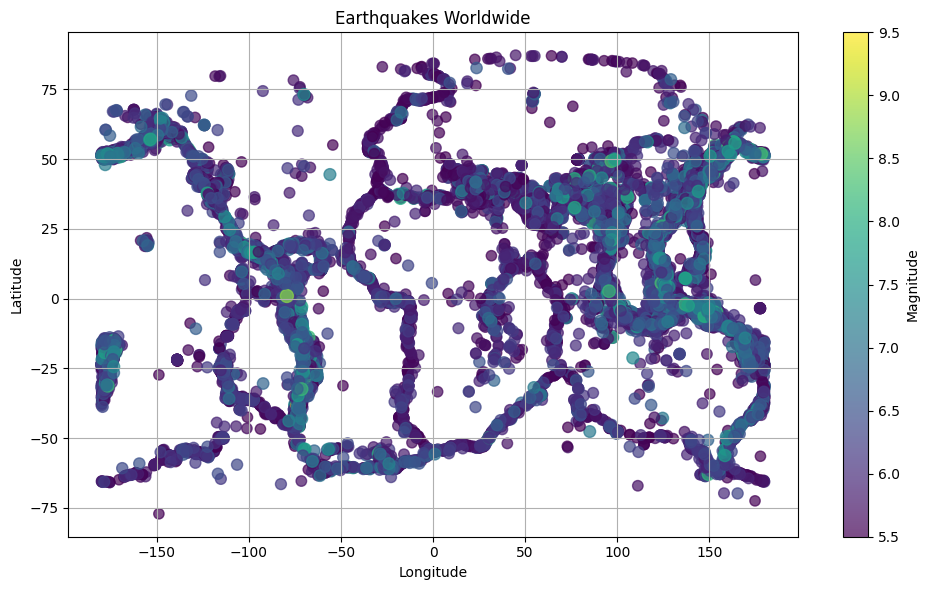

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load earthquake data from CSV file
data = pd.read_csv('/content/new_earthquake.csv')

# Extract relevant columns
latitude = data['Latitude']
longitude = data['Longitude']
magnitude = data['Mag']

# Plotting earthquakes on a world map using Matplotlib
plt.figure(figsize=(10, 6))

# Scatter plot with color representing magnitude
plt.scatter(longitude, latitude, c=magnitude, cmap='viridis', s=magnitude * 10, alpha=0.7)
plt.colorbar(label='Magnitude')  # Add colorbar indicating magnitudes
plt.title('Earthquakes Worldwide')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

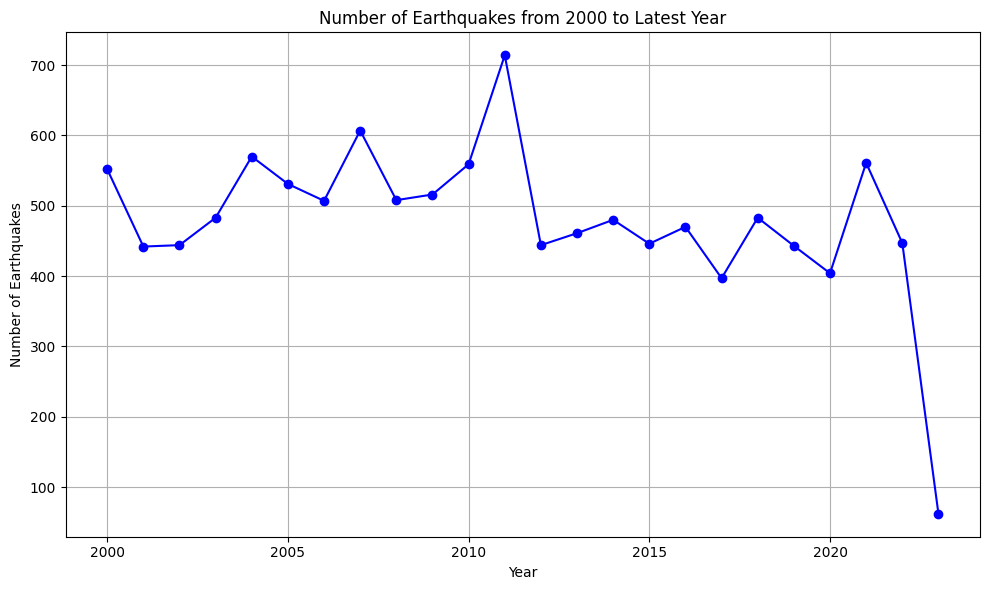

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load earthquake data from CSV file (replace 'earthquake_data.csv' with your file name)
data = pd.read_csv('/content/Earthqdataset.zip')

# Convert the date/time column to Pandas datetime format
data['Time'] = pd.to_datetime(data['Time'])  # Assuming 'Date' is the column containing timestamps

# Define the starting year
start_year = 2000  # Change this to your desired starting year

# Filter the data for earthquakes from the starting year to the latest year
filtered_data = data[data['Time'].dt.year >= start_year]

# Count the number of earthquakes per year
earthquakes_per_year = filtered_data['Time'].dt.year.value_counts().sort_index()

# Plotting the line graph of earthquakes from a certain year to the latest year
plt.figure(figsize=(10, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o', linestyle='-', color='b')
plt.title(f'Number of Earthquakes from {start_year} to Latest Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show()


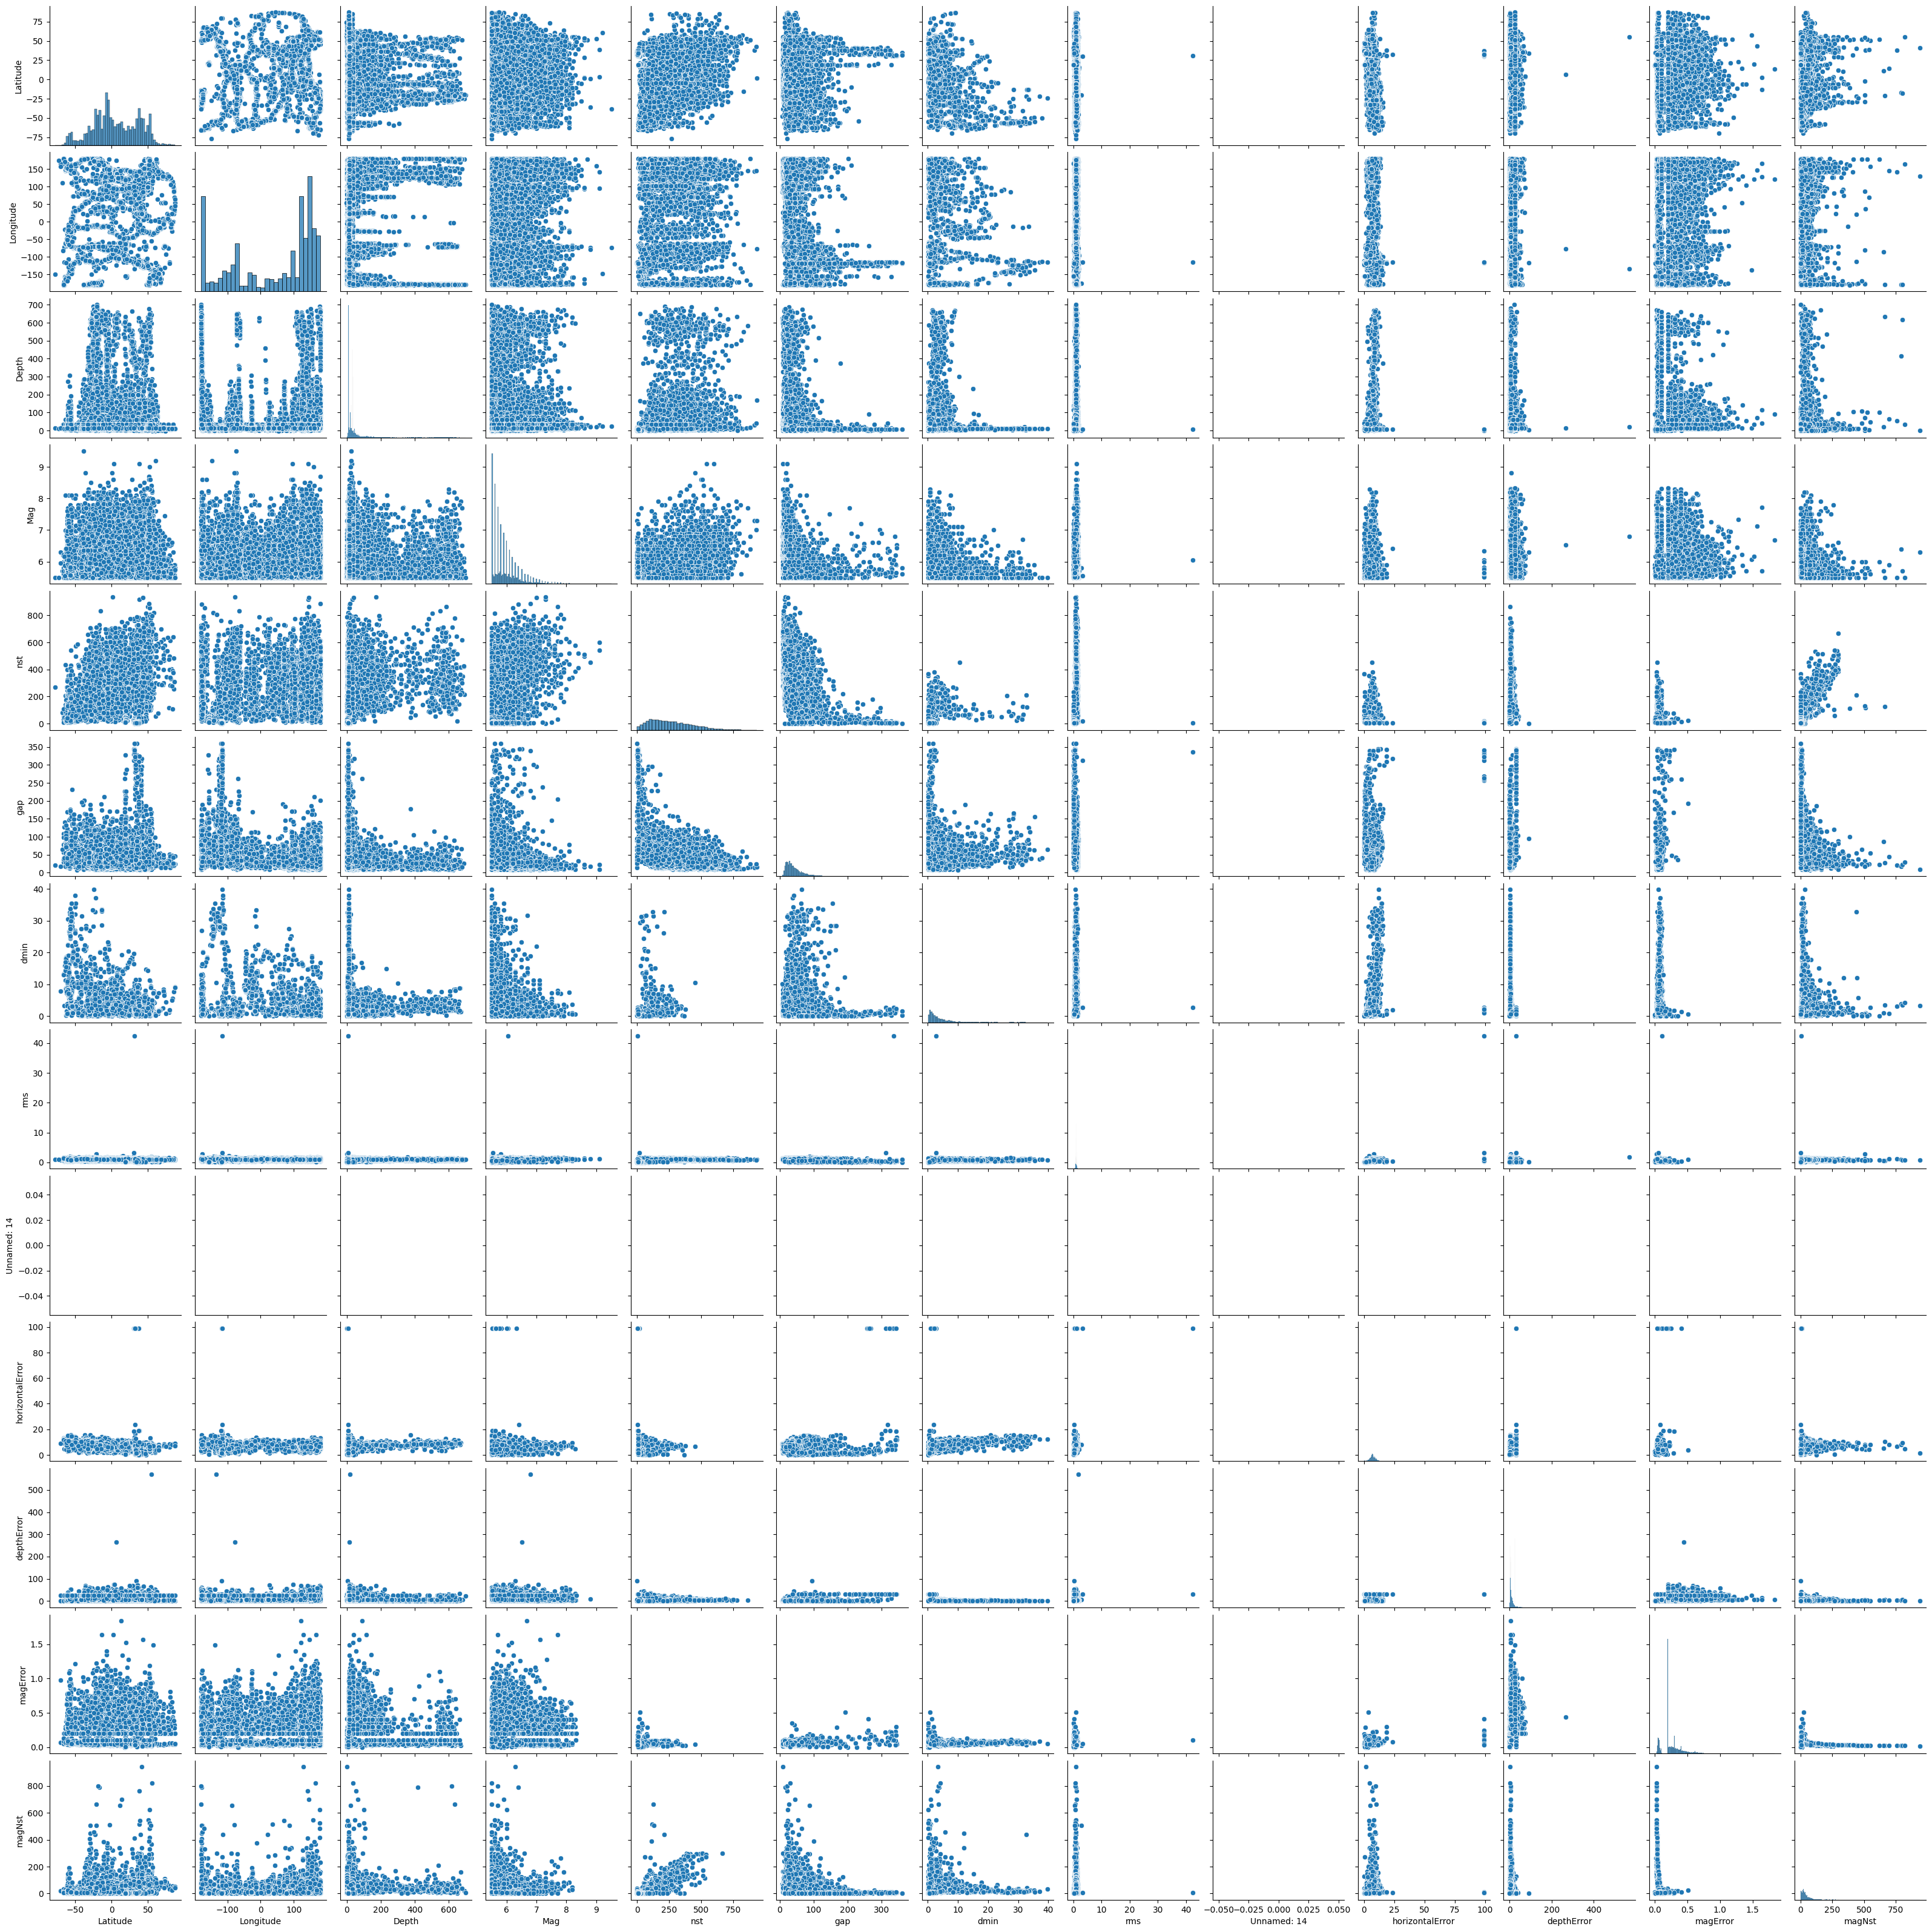

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

In [ ]:
data.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17 09:37:34.868000+00:00,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16 05:37:05.138000+00:00,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15 18:10:10.060000+00:00,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15 06:38:09.034000+00:00,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14 13:16:51.072000+00:00,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [ ]:
import pandas as pd

# Load earthquake dataset from CSV
earthquake_df = pd.read_csv('/content/Earthqdataset.zip')

def calculate_probability(place, earthquake_df):
    total_earthquakes = len(earthquake_df)
    place_earthquakes = len(earthquake_df[earthquake_df['Place'] == place])

    probability = place_earthquakes / total_earthquakes
    return probability

# Replace 'YourPlace' with the actual place you're interested in
place_of_interest = 'Kuril Islands'

# Ensure the 'Place' column in the dataset is formatted consistently (e.g., uppercase)
earthquake_df['Place'] = earthquake_df['Place'].str.upper()

# Calculate the probability
probability = calculate_probability(place_of_interest.upper(), earthquake_df)

print(f"The probability of {place_of_interest} experiencing an earthquake is: {probability:.2%}")


The probability of Kuril Islands experiencing an earthquake is: 0.66%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your earthquake dataset (assuming it's in a CSV file)
# Replace 'your_dataset.csv' with your actual dataset filename
data = pd.read_csv('/content/Earthqdataset.zip')

# Let's assume the dataset has columns like 'latitude', 'longitude', 'depth', 'magnitude', etc.
# Adjust the feature columns accordingly based on your dataset
feature_columns = ['Latitude', 'Longitude', 'Depth', 'Mag']  # Modify this list with appropriate feature columns

# Extract features and target variable
X = data[feature_columns]
y = data['Mag']

# Replace null values with mean using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=feature_columns)

# Assuming you've already trained a model as shown in the previous code
# ...

# Get user input for latitude, longitude, and depth
user_latitude = float(input("Enter Latitude: "))
user_longitude = float(input("Enter Longitude: "))
user_depth = float(input("Enter Depth: "))

# Create a DataFrame with the user input
user_input = pd.DataFrame([[user_latitude, user_longitude, user_depth, 0]], columns=feature_columns) # 0 as a placeholder for magnitude

# Scale the user input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Scale the entire dataset
user_input_scaled = scaler.transform(user_input)  # Scale the user input

# Train a model with the entire dataset (optional, you can use the existing trained model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Predict earthquake magnitude using user input
predicted_magnitude = model.predict(user_input_scaled)
print(f"Predicted Magnitude: {predicted_magnitude[0]}")

# Evaluate the model using Mean Squared Error and R-squared score
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Enter Latitude: 12.3238
Enter Longitude: 123.8662
Enter Depth: 20.088
Predicted Magnitude: 5.5
Mean Squared Error: 7.927331172484168e-07
R-squared Score: 0.999996173430773


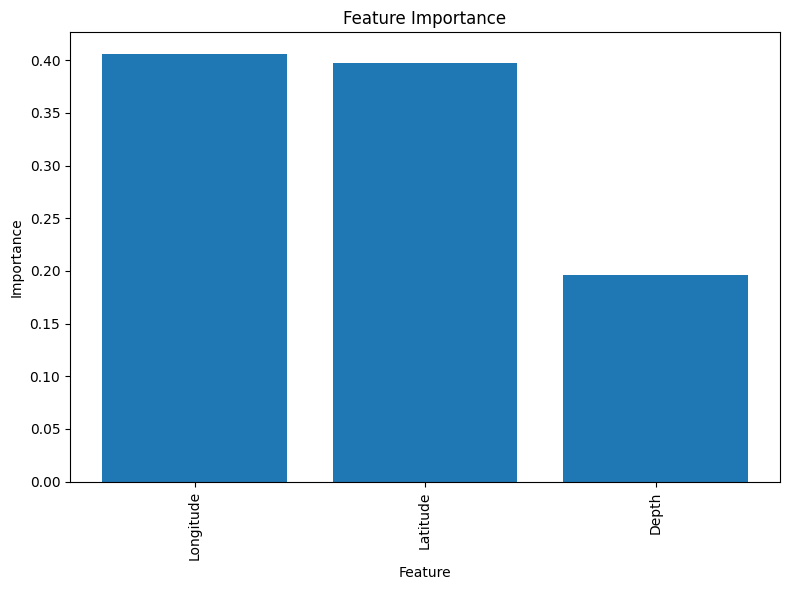

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your earthquake dataset (assuming it's in a CSV file)
# Replace 'your_dataset.csv' with your actual dataset filename
data = pd.read_csv('/content/new_earthquake.csv')

# Let's assume the dataset has columns like 'latitude', 'longitude', 'depth', 'magnitude', etc.
# Adjust the feature columns accordingly based on your dataset
feature_columns = ['Latitude', 'Longitude', 'Depth']  # Modify this list with appropriate feature columns

# Extract features and target variable
X = data[feature_columns]
y = data['Mag']

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Replace null values with mean using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=feature_columns)

# Fit the model with the entire dataset
model.fit(X_imputed, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
